## NCX Channel - II

### Steady-State and Dynamic Properties of Cardiac Sodium-Calcium Exchange

#### Secondary Modulation by Cytoplasmic Calcium and ATP

Presents the dynamic responce of cardiac sodium-calcium exchange current to the changes of cytoplasmic calcum.

In [15]:
import random as random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import pandas as pd

![img](img\i1i2.png)

$\large{F_{Caact} = \frac{Ca_{i}}{(Ca_{i} + K_{Caact})}}$

### Notations

- **$I_1$ :** Sodium Dependent Inactivation at a constant free cytoplasmic calcium concentration
- **$I_2$ :** Inactivation due to absence of Calcium
- **$\alpha_1$ :** Transition to the inactive state
- **$\beta_1$ :** Transition to the inactive state

------------

- **$F_{E13Na}$ :** total exchanger population fully loaded with sodium on the cytoplasmic side
- **$F_{Caact}$ :**  the fraction of exchangers with calcium bound at the regulatory site
- **$Ca_{i}$ :**     the free cytoplasmic calcium concentration
- **$K_{Caact}$** :  the dissociation constant for calcium from the regulatory site

----------------



- **$A_{1}3n$ :** 
- **$A_{1}3n.C$ :** 

------------

- **$I_{1}3n$ :** 
- **$I_{1}3n.C$ :** 

-----------------

- **$A_{2}$ :** 
- **$I_{2}$ :** 

------------------

- **$A_{2}.C$ :** 
- **$I_{2}C$ :** 


- **$K_{1ni}$ :** dissociation constant for first sodium ion
- **$K_{2ni}$ :** dissociation constant for second sodium ion
- **$K_{3ni}$ :** dissociation constant for third sodium ion
- **$K_{ci}$ :** dissociation constant for calcium from the binding site

### Constants

- **Rate Constant** : $\alpha_{1Caoff} = 0.66 s^{-1}$
- **Rate Constant** : $\alpha_{1Caon} = 0.03 s^{-1}$
- **Rate Constant** : $\beta_{1Caoff} = 0.015 s^{-1}$
- **Rate Constant** : $\beta_{1Caon} = 1.0 s^{-1}$

- **Rate Constant** : $\alpha_{2Caoff} = 0.25 s^{-1}$
- **Rate Constant** : $\alpha_{2Caon} = 0.00005 s^{-1}$
- **Rate Constant** : $\beta_{2Caoff} = 0.00005 s^{-1}$
- **Rate Constant** : $\beta_{2Caon} = 50 s^{-1}$

- $K_{1ni} = 126 mM$
- $K_{2ni} = K_{3ni} 11 mM$
- $K_{ci} = 18 \mu M$
- $K_{Cact} = 0.04 mM$

------------

In [9]:
alpha_1Caoff = 0.66
alpha_1Caon = 0.03
beta_1Caoff = 0.015
beta_1Caon = 1.0

In [10]:
Ca_i = 1.0
K_Caact = 1.0
F_Caact = Ca_i/(Ca_i + K_Caact)
F_E13Na = 1.0


In [12]:
alpha_1 = F_E13Na*(F_Caact*alpha_1Caon + (1-F_Caact)*alpha_1Caoff)
beta_1 = F_Caact*beta_1Caon + (1-F_Caact)*beta_1Caoff
(alpha_1, beta_1)

(0.34500000000000003, 0.5075)

### Model : Monte Carlo Simulation of Markov Model

#### Tansition Probabilities

In [16]:
M = {"A13n": [1 - a1_caoff, a1_caoff],
    "I3n":  [b1_caoff, 1-b1_caoff]}

#### States

In [17]:
states = ["A13n",\
          "I3n"]

#### Simulation

In [19]:
current_state = "A13n"
T =100
N =100

SS = [["A13n" for n in range (T)] for t in range(N)]

for n in range(N):
    for t in range(T):
        new_state = np.random.choice(states, p = M[current_state])
        #print(new_state)
        SS[n][t] = new_state
        current_state = new_state 

In [20]:
ss = np.array(SS)

In [22]:
Data = []
for t in range(T):
    a13n = list(ss[:,t]).count("A13n")/float(N)
    i3n = list(ss[:,t]).count("I3n")/float(N)
    
    
    Data.append({"A13n" : a13n,\
          "I3n": i3n})

-------

### Results

In [23]:
DF = pd.DataFrame(Data)
DF.head()

,A13n,I3n
0,0.59,0.41
1,0.60,0.40
2,0.59,0.41
3,0.58,0.42
4,0.54,0.46


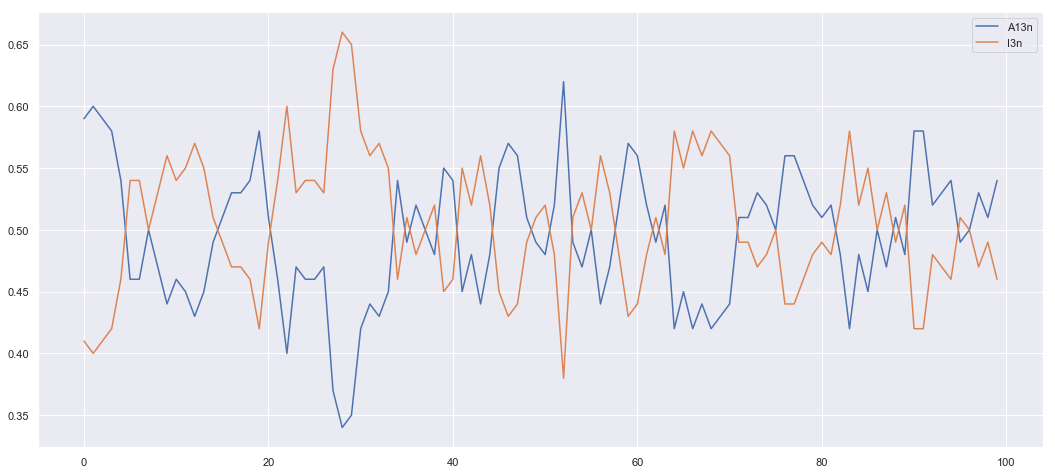

In [24]:
DF.plot(figsize = [18,8])

#### Current Measurement

In [99]:
S = 1.0

In [100]:
I_naca = S*DF["Fa"]*DF["F3n"]

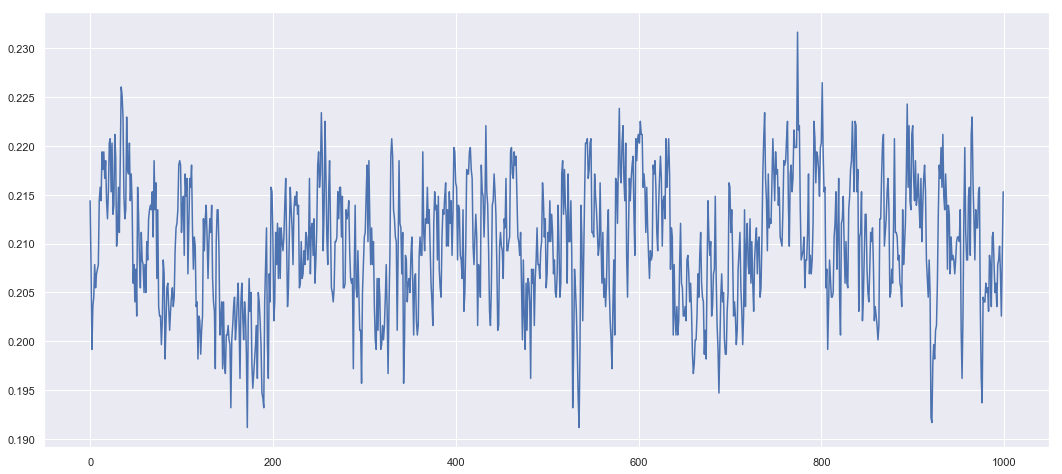

In [101]:
I_naca.plot(figsize = [18,8])

### Discussion